In [1]:
import torch
import fastai

In [2]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 13.44 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [3]:
!cd OIDv4_ToolKit && pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 99.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 14.9 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1


In [4]:
!cd OIDv4_ToolKit && python main.py downloader --Dataset /content --classes Grape Strawberry Banana Pineapple --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Grape.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 58000 KB/s, 0 seconds passed
[DOWNLOAD] | File cl

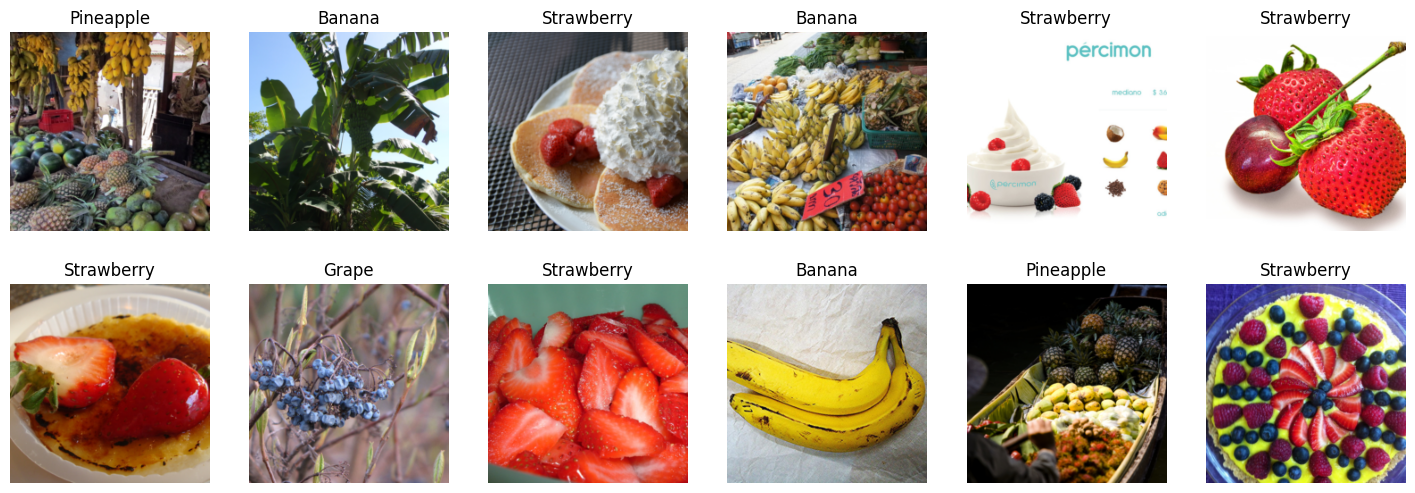

In [5]:
from fastai.vision.all import *
from ipywidgets import widgets

#path
path = Path('train')

#datablock yaratish
fruits = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)
#dataloader yaratish
dls = fruits.dataloaders(path)

#datasetni tekshirish
dls.train.show_batch(max_n=12, nrows=2)

In [6]:
#training
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(8)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 189MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.739892,0.857606,0.731250,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.686827,0.571538,0.793750,00:13
1,0.501607,0.507191,0.831250,00:12
2,0.379724,0.511691,0.837500,00:11
3,0.280476,0.606332,0.862500,00:12
4,0.218404,0.606790,0.868750,00:11
5,0.175398,0.592723,0.856250,00:12
6,0.143610,0.584113,0.856250,00:12
7,0.120759,0.581558,0.856250,00:12


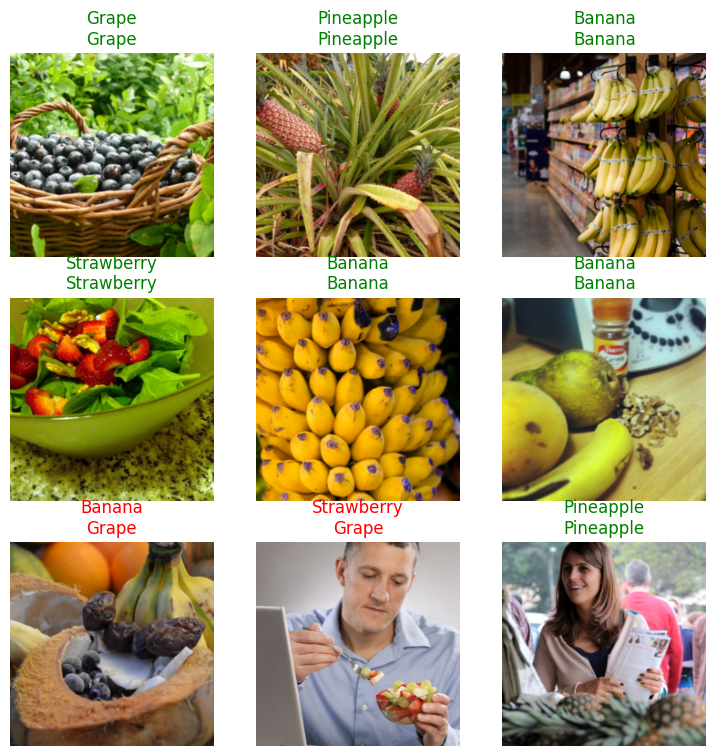

In [7]:
#tekshirish
learn.show_results()

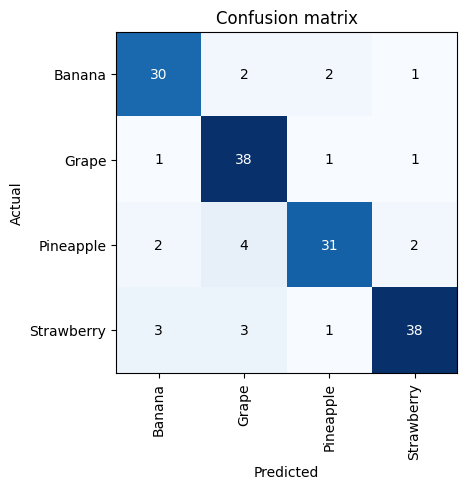

In [8]:
# tekshirish confusion metrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

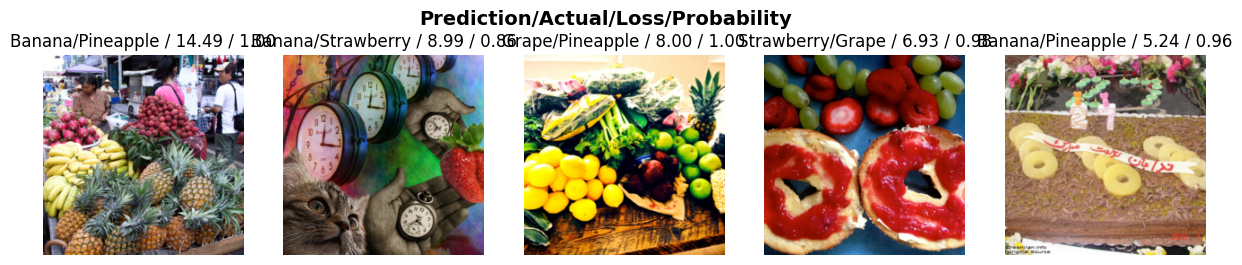

In [9]:
interp.plot_top_losses(5, nrows=1)

In [10]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat: Pineapple
Ehtimollik: 99.97%


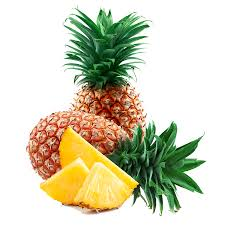

In [12]:
img = PILImage.create(upload.data[-1])
img.to_thumb(224)
pred, pred_idx, probs = learn.predict(img)
print(f'Bashorat: {pred}')
print(f'Ehtimollik: {probs[pred_idx]*100:.2f}%')
img

In [13]:
# modelni saqlash
learn.export('fruits.pkl')

In [ ]:
model = load_learner('/content/fruits_model.pkl')
model.predict(img)

In [14]:
fastai.__version__

'2.7.15'